In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier


from sklearn.metrics import confusion_matrix, f1_score
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.metrics import cohen_kappa_score

import warnings
warnings.filterwarnings('ignore')

In [9]:
# Load the data
data = pd.read_csv('data.csv')

In [10]:
from sklearn.impute import SimpleImputer

# Create the imputer
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

# Fit the imputer and transform the data
data_filled = imp.fit_transform(data)

# Convert the result back to a DataFrame (if needed)
data_filled = pd.DataFrame(data_filled, columns=data.columns, index=data.index)

In [11]:
# Define predictors and target
X = data_filled.drop(['death', 'id'], axis=1)

# Identify numerical columns (excluding boolean columns)
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
boolean_cols = X.columns[X.nunique() <= 2]
numerical_cols = numerical_cols.difference(boolean_cols)

# Initialize a scaler object
scaler = MinMaxScaler()

# Fit and transform the numerical columns
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])
print(X.shape)
y = data_filled['death']

(14000, 29)


In [12]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### RANDOM FOREST ###

In [13]:
# Initialize the RandomForestClassifier
clf = RandomForestClassifier(n_estimators=1620, max_depth=27, min_samples_split=15, min_samples_leaf=1, random_state=42)

# Fit the model
clf.fit(X_train, y_train)

# Predict the classes for the train set
y_train_pred = clf.predict(X_train)

# Print the accuracy score for the train set
print('Train Accuracy:', accuracy_score(y_train, y_train_pred))

# Predict the classes for the test set
y_pred = clf.predict(X_test)

# Print the accuracy score for the test set
print('Test Accuracy:', accuracy_score(y_test, y_pred))


Train Accuracy: 0.8974107142857143
Test Accuracy: 0.7146428571428571


### DECISION TREE ###

In [14]:
# Initialize the RandomForestClassifier
dtree = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=16, min_samples_split=15, min_samples_leaf=3, random_state=42)

# Fit the model
dtree.fit(X_train, y_train)

# Predict the classes for the train set
y_train_pred = dtree.predict(X_train)

# Print the accuracy score for the train set
print('Train Accuracy:', accuracy_score(y_train, y_train_pred))

# Predict the classes for the test set
y_pred = dtree.predict(X_test)

# Print the accuracy score for the test set
print('Test Accuracy:', accuracy_score(y_test, y_pred))


Train Accuracy: 0.77875
Test Accuracy: 0.6546428571428572


### SVM ###

In [15]:

# Initialize the SVM classifier
svm = SVC(kernel='rbf', random_state=42, probability=True)

# Fit the model using the training data
svm.fit(X_train, y_train)

# Predict the classes for the train set
y_train_pred = svm.predict(X_train)

# Print the accuracy score for the train set
print('Train Accuracy:', accuracy_score(y_train, y_train_pred))

# Predict the classes for the test set
y_pred = svm.predict(X_test)

# Print the accuracy score for the test set
print('Test Accuracy:', accuracy_score(y_test, y_pred))

Train Accuracy: 0.6945535714285714
Test Accuracy: 0.6621428571428571


### XGBOOST ###

In [16]:
# Initialize the XGBClassifier with the optimized parameters
xgb = XGBClassifier(
    use_label_encoder=False, 
    eval_metric='logloss',
    n_estimators=567, 
    max_depth=10,
    learning_rate=9.862035723366812e-05, 
    subsample=0.24669633483436512, 
    colsample_bytree=0.9925727751818354, 
    gamma=1.7031376045803879
)

# Fit the model
xgb.fit(X_train, y_train)

# Predict the classes for the train set
y_train_pred = xgb.predict(X_train)

# Print the accuracy score for the train set
print('Train Accuracy:', accuracy_score(y_train, y_train_pred))

# Predict the classes for the test set
y_pred = xgb.predict(X_test)

# Print the accuracy score for the test set
print('Test Accuracy:', accuracy_score(y_test, y_pred))


Train Accuracy: 0.7395535714285715
Test Accuracy: 0.7096428571428571


### KNN ###

In [17]:
# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=6, metric='matching')

# Fit the model using the training data
knn.fit(X_train, y_train)

# Predict the classes for the train set
y_train_pred = knn.predict(X_train)

# Print the accuracy score for the train set
print('Train Accuracy:', accuracy_score(y_train, y_train_pred))

# Predict the classes for the test set
y_pred = knn.predict(X_test)

# Print the accuracy score for the test set
print('Test Accuracy:', accuracy_score(y_test, y_pred))

Train Accuracy: 0.6352678571428572
Test Accuracy: 0.5382142857142858


In [18]:
classifiers = [('RandomForest', clf), ('SVM', svm), ('XGBoost', xgb), ('KNN', knn), ('DecisionTree', dtree)]

RandomForest F1 Score: 0.7085005472455309
SVM F1 Score: 0.6470149253731342
XGBoost F1 Score: 0.7029594446474242
KNN F1 Score: 0.43561763422086425
DecisionTree F1 Score: 0.6371482176360226


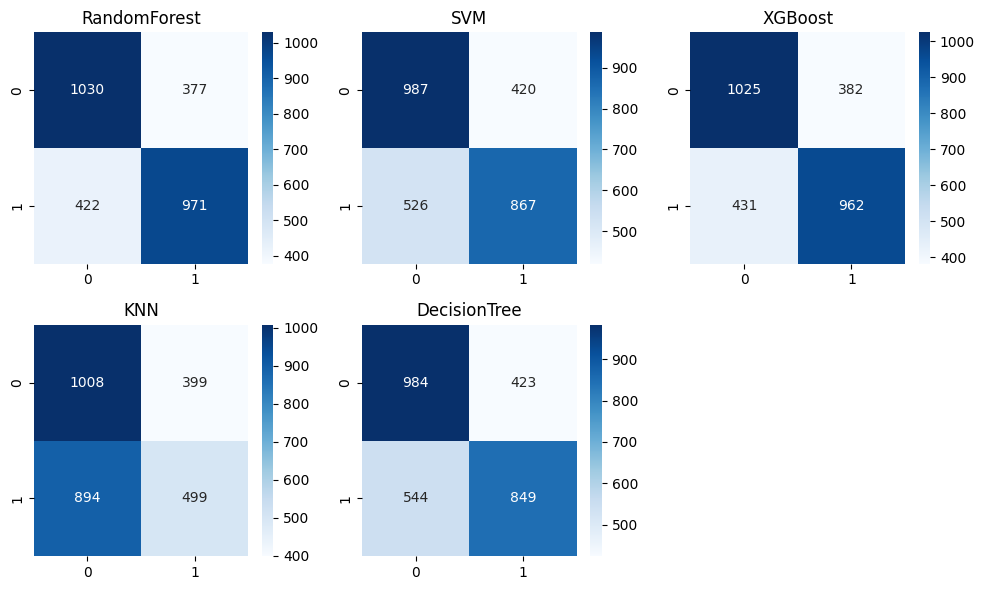

In [19]:
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

fig, axs = plt.subplots(2, 3, figsize=(10, 6))

for ax, (name, model) in zip(axs.flatten(), classifiers):
    # Fit the model
    model.fit(X_train, y_train)

    # Predict the classes
    y_pred = model.predict(X_test)

    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test, y_pred)

    f1 = f1_score(y_test, y_pred)
    print(f'{name} F1 Score:', f1)

    # Plot confusion matrix
    sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap=plt.cm.Blues, ax=ax)
    ax.title.set_text(f'{name}')

# Remove unused subplots
for i in range(len(classifiers), len(axs.flatten())):
    fig.delaxes(axs.flatten()[i])

plt.tight_layout()
plt.show()


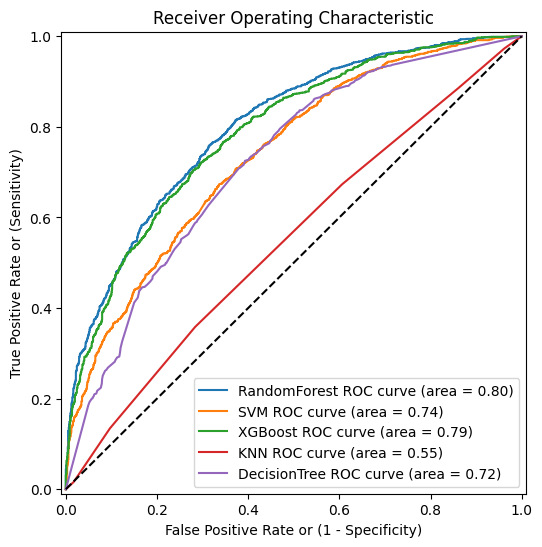

In [20]:

classifiers = [('RandomForest', clf), ('SVM', svm), ('XGBoost', xgb), ('KNN', knn), ('DecisionTree', dtree)]

plt.figure(figsize=(6,6))

for name, model in classifiers:
    # Fit the model
    model.fit(X_train, y_train)

    # Compute the ROC curve
    y_score = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'{name} ROC curve (area = {roc_auc:.2f})')

# Plot settings
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate or (1 - Specificity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plt.show()


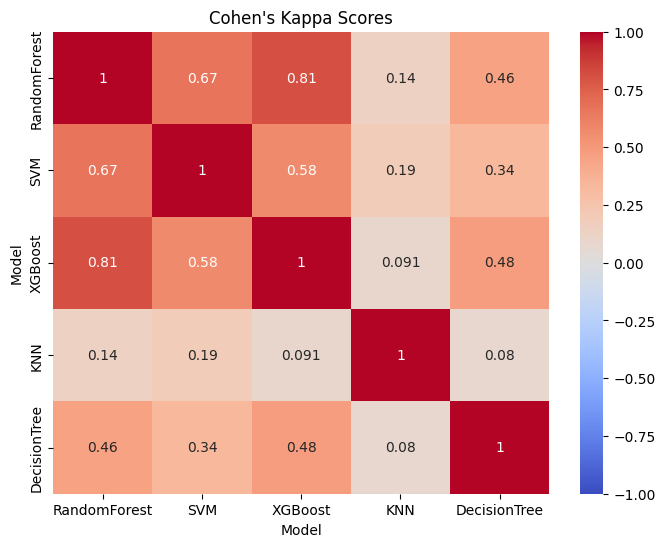

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def calculate_cohens_kappa(models, X, y):
    # Initialize dictionary to store kappa scores
    kappa_scores = {}
    # Make predictions with each model
    model_preds = {name: model.predict(X) for name, model in models.items()}
    # Compare each pair of models
    for model1, preds1 in model_preds.items():
        kappa_scores[model1] = {}
        for model2, preds2 in model_preds.items():
            # Calculate kappa score
            kappa = cohen_kappa_score(preds1, preds2)
            kappa_scores[model1][model2] = kappa
    return kappa_scores

models = {'RandomForest': clf, 'SVM': svm, 'XGBoost': xgb, 'KNN': knn, 'DecisionTree': dtree}
kappa_scores = calculate_cohens_kappa(models, X_test, y_test)

# Convert kappa scores to DataFrame for better visualization
kappa_df = pd.DataFrame(kappa_scores)

# Plotting the kappa scores as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(kappa_df, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Cohen\'s Kappa Scores')
plt.xlabel('Model')
plt.ylabel('Model')
plt.show()


In [22]:
models_result = pd.DataFrame({'Ground Truth': y_test})

# Add a column for each model's prediction
for name, model in classifiers:
    y_pred = model.predict(X_test)
    models_result[name] = y_pred
    
print(models_result)
models_result.to_csv('models_result.csv', index=False)

       Ground Truth  RandomForest  SVM  XGBoost  KNN  DecisionTree
2900            1.0           1.0  1.0        1  0.0           1.0
3143            1.0           1.0  1.0        1  0.0           1.0
8231            1.0           1.0  0.0        1  0.0           0.0
3855            0.0           0.0  0.0        0  1.0           0.0
8045            1.0           1.0  1.0        1  0.0           1.0
...             ...           ...  ...      ...  ...           ...
5130            0.0           0.0  1.0        0  1.0           0.0
9657            1.0           1.0  0.0        1  1.0           0.0
11668           0.0           0.0  0.0        0  1.0           0.0
12065           0.0           0.0  0.0        1  0.0           0.0
10479           1.0           1.0  1.0        1  0.0           1.0

[2800 rows x 6 columns]


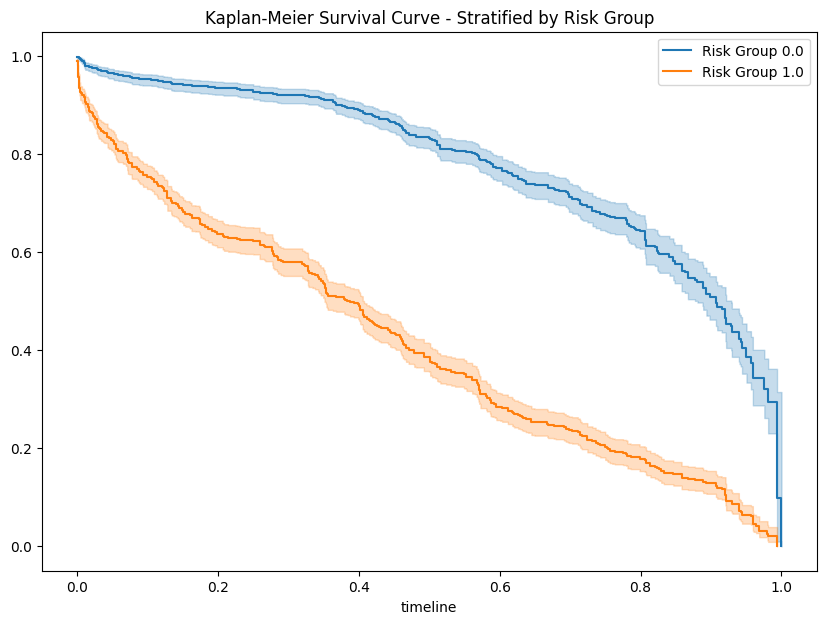

In [23]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# Initialize KaplanMeierFitter
kmf = KaplanMeierFitter()

# Create a new DataFrame with test data and corresponding predictions
data = X_test.copy()
data['prediction'] = clf.predict(X_test)
data['true_label'] = y_test  # add true labels

plt.figure(figsize=(10, 7))
ax = plt.subplot(111)

# Assuming 'fu_time' is your time-to-event data in X_test
for prediction, grouped_df in data.groupby('prediction'):
    kmf.fit(grouped_df['fu_time'], grouped_df['true_label'], label='Risk Group '+str(prediction))
    kmf.plot_survival_function(ax=ax)

plt.title('Kaplan-Meier Survival Curve - Stratified by Risk Group')
plt.show()

In [26]:
import random

# Define the min and max ages for the random age
min_age = 20
max_age = 90

# Generate a new individual
new_individual = pd.DataFrame({
    'los': [random.randint(1, 50)],   # Random integer between 1 and 50
    'age': [random.randint(min_age, max_age)],   # Random integer between min_age and max_age
    'gender': [random.randint(0, 1)],   # Random integer 0 or 1
    'cancer': [random.randint(0, 1)],   # Random integer 0 or 1
    'cabg': [random.randint(0, 1)],   # Random integer 0 or 1
    'crt': [random.randint(0, 1)],   # Random integer 0 or 1
    'defib': [random.randint(0, 1)],   # Random integer 0 or 1
    'dementia': [random.randint(0, 1)],   # Random integer 0 or 1
    'diabetes': [random.randint(0, 1)],   # Random integer 0 or 1
    'hypertension': [random.randint(0, 1)],   # Random integer 0 or 1
    'ihd': [random.randint(0, 1)],   # Random integer 0 or 1
    'mental_health': [random.randint(0, 1)],   # Random integer 0 or 1
    'arrhythmias': [random.randint(0, 1)],   # Random integer 0 or 1
    'copd': [random.randint(0, 1)],   # Random integer 0 or 1
    'obesity': [random.randint(0, 1)],   # Random integer 0 or 1
    'pvd': [random.randint(0, 1)],   # Random integer 0 or 1
    'renal_disease': [random.randint(0, 1)],   # Random integer 0 or 1
    'valvular_disease': [random.randint(0, 1)],   # Random integer 0 or 1
    'metastatic_cancer': [random.randint(0, 1)],   # Random integer 0 or 1
    'pacemaker': [random.randint(0, 1)],   # Random integer 0 or 1
    'pneumonia': [random.randint(0, 1)],   # Random integer 0 or 1
    'prior_appts_attended': [random.randint(0, 10)],   # Random integer between 0 and 10
    'prior_dnas': [random.randint(0, 5)],   # Random integer between 0 and 5
    'pci': [random.randint(0, 1)],   # Random integer 0 or 1
    'stroke': [random.randint(0, 1)],   # Random integer 0 or 1
    'senile': [random.randint(0, 1)],   # Random integer 0 or 1
    'quintile': [random.randint(1, 5)],   # Random integer between 1 and 5
    'ethnicgroup': [random.randint(1, 5)],   # Random integer between 1 and 5
    'fu_time': [random.randint(1, 1000)]   # Random integer between 1 and 1000
})

# Now scale the non-boolean values (Here 'los', 'age', 'prior_appts_attended', 'prior_dnas', 'quintile', 'ethnicgroup', 'fu_time')
# Using min max scaler of the train set
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit(X_train[['los', 'age', 'prior_appts_attended', 'prior_dnas', 'quintile', 'ethnicgroup', 'fu_time']])
new_individual[['los', 'age', 'prior_appts_attended', 'prior_dnas', 'quintile', 'ethnicgroup', 'fu_time']] = scaler.transform(new_individual[['los', 'age', 'prior_appts_attended', 'prior_dnas', 'quintile', 'ethnicgroup', 'fu_time']])


In [27]:
# Make prediction on the new individual
prediction = knn.predict(new_individual)

# Find the nearest neighbor's index
distances, indices = knn.kneighbors(new_individual)

# If the model predicts the person will die
if prediction[0] == 1:
    nearest_neighbor_index = indices[0][0]
    days_to_live = X_train.iloc[nearest_neighbor_index]['fu_time']
    print(f"You have {np.round(days_to_live * 1024)} days to live.")
else:
    print("You will not die.")

You have 137.0 days to live.
